## Feature Engineering

In [18]:

import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [15]:
#data=pd.read_csv('B500Kflight.csv',parse_dates= ['fl_date'],encoding='utf-8-sig'
#            )   
data=pd.read_csv('Bcleaned_Train_data.csv',parse_dates= ['fl_date'],encoding='utf-8-sig'
            )   
#data['Month'] = data['Date'].dt.month,data['Day'] = data['Date'].dt.day)
test=data.copy()

In [19]:
train_data=data.fillna(0)
train_data.isnull().sum()

Unnamed: 0            0
fl_date               0
mkt_unique_carrier    0
mkt_carrier_fl_num    0
op_unique_carrier     0
tail_num              0
op_carrier_fl_num     0
origin_airport_id     0
origin                0
origin_city_name      0
dest_airport_id       0
dest                  0
dest_city_name        0
crs_dep_time          0
crs_arr_time          0
dup                   0
crs_elapsed_time      0
flights               0
distance              0
arr_delay             0
carrier_delay         0
weather_delay         0
dep_delay             0
taxi_out              0
taxi_in               0
dtype: int64

## Adding and testing Features to Train Dataset


### 1- Total delay

In [26]:
test3=train_data.copy() #according to arrvie delay
#test3['TotalDelay'] = test3.apply(lambda x: ((x['dep_delay'] + x['arr_delay'] +x['carrier_delay'] +x['weather_delay'] + x['late_aircraft_delay']+x['security_level'])),  axis=1)


   ### 2- IS DELAYED

In [ ]:

#test3.loc[(test3['TotalDelay'].ge(0)),"is_delayed"]=1
#test3.loc[~(test3['TotalDelay'].ge(0)),"is_delayed"]=0

In [27]:
test3.loc[(test3['arr_delay'].ge(0)),"is_delayed"]=1
test3.loc[~(test3['arr_delay'].ge(0)),"is_delayed"]=0

## 3,4,5- Day,Month, Day of week

In [28]:

test3["year"]=test3['fl_date'].dt.year
test3["month"]=test3['fl_date'].dt.month
test3["day"]=test3['fl_date'].dt.day
test3["dayOfWeek"]=test3['fl_date'].dt.dayofweek


In [29]:
test3

,Unnamed: 0,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,carrier_delay,weather_delay,dep_delay,taxi_out,taxi_in,is_delayed,year,month,day,dayOfWeek
0,0,2019-09-14,AA,1059,AA,N552UW,1059,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1026,1205,N,99,1,337,-22.0,0.0,0.0,-4.0,13.0,10.0,0.0,2019,9,14,5
1,1,2019-06-04,DL,1216,DL,N961AT,1216,10431,AVL,"Asheville, NC",10397,ATL,"Atlanta, GA",600,701,N,61,1,164,-13.0,0.0,0.0,-7.0,15.0,7.0,0.0,2019,6,4,1
2,2,2019-06-05,UA,236,UA,N24706,236,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1430,1617,N,107,1,534,13.0,0.0,0.0,-3.0,30.0,4.0,1.0,2019,6,5,2
3,3,2019-09-11,AS,1936,AS,N624VA,1936,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1800,1935,N,95,1,337,34.0,2.0,0.0,41.0,23.0,11.0,1.0,2019,9,11,2
4,4,2019-05-19,AA,5714,YV,N919FJ,5714,11298,DFW,"Dallas/Fort Worth, TX",11973,GPT,"Gulfport/Biloxi, MS",1025,1203,N,98,1,500,104.0,22.0,0.0,106.0,20.0,4.0,1.0,2019,5,19,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477394,499995,2019-03-03,UA,2275,UA,N78506,2275,11618,EWR,"Newark, NJ",14635,RSW,"Fort Myers, FL",1600,1906,N,186,1,1068,-13.0,0.0,0.0,-3.0,15.0,4.0,0.0,2019,3,3,6
477395,499996,2019-11-10,UA,6061,YV,N88301,6061,12266,IAH,"Houston, TX",14492,RDU,"Raleigh/Durham, NC",1420,1759,N,159,1,1042,2.0,0.0,0.0,0.0,15.0,6.0,1.0,2019,11,10,6
477396,499997,2019-03-11,AS,3303,OO,N181SY,3303,15376,TUS,"Tucson, AZ",14831,SJC,"San Jose, CA",815,1030,N,135,1,722,-16.0,0.0,0.0,-9.0,15.0,7.0,0.0,2019,3,11,0
477397,499998,2019-01-03,DL,5738,CP,N603CZ,5738,14869,SLC,"Salt Lake City, UT",10140,ABQ,"Albuquerque, NM",940,1130,N,110,1,493,-10.0,0.0,0.0,0.0,28.0,6.0,0.0,2019,1,3,3


Text(0.5, 0, '')

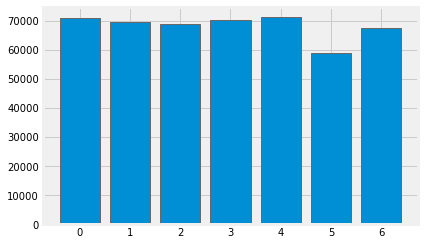

In [35]:
test4=test3[(test3['is_delayed']==1)]
#test4=test3[(test3['arr_delay']<60)&(test3['arr_delay']>-60)]
test5=test3[['dayOfWeek','arr_delay']].groupby('dayOfWeek').count().reset_index()
test6=test3[['dayOfWeek','arr_delay']].groupby('dayOfWeek').mean().reset_index()
plt.bar(test5['dayOfWeek'],test5['arr_delay'])
plt.xlabel('')
#plt.yticks(rotation=45)


Text(0.5, 1.0, 'Mean of Arrival delay on the days of the week')

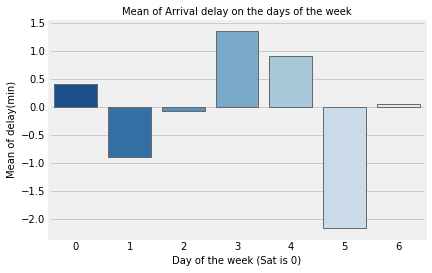

In [45]:
s=sns.barplot(test6['dayOfWeek'],test6['arr_delay'],palette ='Blues_r')
s.set_xlabel("Day of the week (Sat is 0)", fontsize = 10)
s.set_ylabel("Mean of delay(min)", fontsize = 10)
s.set_title("Mean of Arrival delay on the days of the week", fontsize = 10)

the delay is not much related to the day of the week

<BarContainer object of 12 artists>

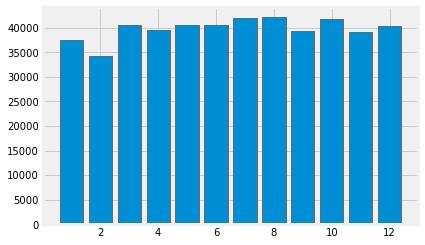

In [51]:
test5=test3[['month','arr_delay']].groupby('month').count().reset_index()
test6=test3[['month','arr_delay']].groupby('month').mean().reset_index()
plt.bar(test5['month'],test5['arr_delay'])

Text(0.5, 1.0, 'Mean of Arrival delay on the days of the week')

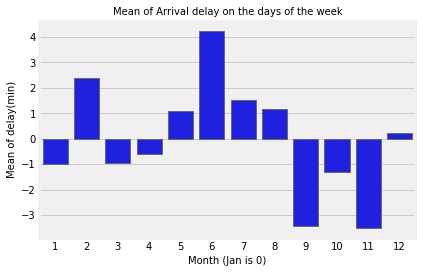

In [58]:
#plt.bar(test6['month'],test6['arr_delay'])

s=sns.barplot(test6['month'],test6['arr_delay'],color ='Blue')
s.set_xlabel("Month (Jan is 0)", fontsize = 10)
s.set_ylabel("Mean of delay(min)", fontsize = 10)
s.set_title("Mean of Arrival delay on the days of the week", fontsize = 10)

### 5-  AirLine (carrier)

Text(0.5, 1.0, 'The flights with Arrival delay by each Airline ')

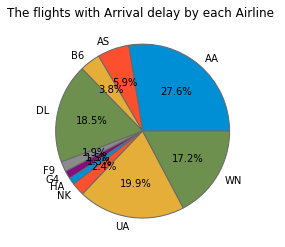

In [73]:
test5=test4[['mkt_unique_carrier','arr_delay']].groupby('mkt_unique_carrier').count().reset_index()
plt.pie(test5['arr_delay'],labels=test5['mkt_unique_carrier'],autopct='%1.1f%%', )
plt.title('The flights with Arrival delay by each Airline ',fontsize=12)


In [74]:
test51=test5[['mkt_unique_carrier','arr_delay']].sort_values(by ='arr_delay',ascending=False)
test51

,mkt_unique_carrier,arr_delay
0,AA,45902
8,UA,33083
3,DL,30779
9,WN,28696
1,AS,9774
2,B6,6346
7,NK,4022
4,F9,3148
5,G4,2447
6,HA,2166


In [75]:
test55=test5['arr_delay'].describe().reset_index()
mean=test55.loc[test55['index']=='mean','arr_delay'].values[0]
test52=test5[test51['arr_delay'].gt(mean)]

In [76]:
test52['Airline_coeff']=(test52['arr_delay']-mean)/mean

In [77]:
test52.to_csv('Ariline_coeff.csv')

In [78]:
for a in test52.iterrows():
    test3.loc[test3['mkt_unique_carrier']==a[1]['mkt_unique_carrier'],'Airline_coeff']=\
    a[1]['Airline_coeff']
test3['Airline_coeff'].fillna(0,inplace=True)

In [ ]:
#test3['Airline_coeff'].isnull().sum()

##  6- Origin airport

In [79]:
test3.dest.str.strip()
test3.origin.str.strip()
Dest=test3.dest.unique()
Orig=test3.origin.unique()


In [80]:
from geopy.geocoders import Nominatim
origloc=[]
for a in Orig:
    address=a+' Airport'   
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)

    #print(location.address)
    try:
        origloc.append([a,location.latitude, location.longitude])
    except:
        print(address)
        origloc.append([a,0, 0])

ISN Airport


In [ ]:
test8=test3[['origin','arr_delay']].groupby('origin').sum().reset_index()

In [ ]:
test8

,origin,arr_delay
0,ABE,-888.0
1,ABI,-707.0
2,ABQ,735.0
3,ABR,-1.0
4,ABY,-391.0
...,...,...
368,XNA,-459.0
369,XWA,-45.0
370,YAK,-140.0
371,YKM,72.0


In [82]:
orig_loc=pd.DataFrame(origloc,columns=['Origin_Arprt','Lat','Lon'])
orig_loc['Lat'].replace({0:48.162246},inplace=True)
orig_loc['Lon'].replace({0:-103.6313081 },inplace=True)
orig_loc[orig_loc['Origin_Arprt']=='ISN']

,Origin_Arprt,Lat,Lon
271,ISN,48.162246,-103.631308


In [83]:
orig_loc

,Origin_Arprt,Lat,Lon
0,SFO,37.622452,-122.384072
1,AVL,35.436423,-82.540881
2,ATL,33.637799,-84.429271
3,DFW,32.896519,-97.046522
4,DCA,38.851289,-77.039689
...,...,...,...
368,HYA,41.670766,-70.284390
369,OGD,41.194563,-112.013520
370,GST,12.982778,80.169325
371,AKN,58.675317,-156.649387


In [84]:
for a in orig_loc.iterrows():
    
    test3.loc[test3['origin']==a[1]['Origin_Arprt'],"Lat"]=a[1]["Lat"]
    test3.loc[test3['origin']==a[1]['Origin_Arprt'],"Lon"]=a[1]["Lon"]


In [ ]:
test3

,Unnamed: 0,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,carrier_delay,weather_delay,dep_delay,taxi_out,taxi_in,is_delayed,year,month,day,dayOfWeek,crs_Speed Mile/Min,Airline_coeff,Lat,Lon
0,0,2019-09-14,AA,1059,AA,N552UW,1059,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1026,1205,N,99,1,337,-22.0,0.0,0.0,-4.0,13.0,10.0,0.0,2019,9,14,5,204.242424,1.759147,37.622452,-122.384072
1,1,2019-06-04,DL,1216,DL,N961AT,1216,10431,AVL,"Asheville, NC",10397,ATL,"Atlanta, GA",600,701,N,61,1,164,-13.0,0.0,0.0,-7.0,15.0,7.0,0.0,2019,6,4,1,161.311475,0.850111,35.436423,-82.540881
2,2,2019-06-05,UA,236,UA,N24706,236,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1430,1617,N,107,1,534,13.0,0.0,0.0,-3.0,30.0,4.0,1.0,2019,6,5,2,299.439252,0.988603,33.637799,-84.429271
3,3,2019-09-11,AS,1936,AS,N624VA,1936,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1800,1935,N,95,1,337,34.0,2.0,0.0,41.0,23.0,11.0,1.0,2019,9,11,2,212.842105,0.000000,37.622452,-122.384072
4,4,2019-05-19,AA,5714,YV,N919FJ,5714,11298,DFW,"Dallas/Fort Worth, TX",11973,GPT,"Gulfport/Biloxi, MS",1025,1203,N,98,1,500,104.0,22.0,0.0,106.0,20.0,4.0,1.0,2019,5,19,6,306.122449,1.759147,32.896519,-97.046522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477394,499995,2019-03-03,UA,2275,UA,N78506,2275,11618,EWR,"Newark, NJ",14635,RSW,"Fort Myers, FL",1600,1906,N,186,1,1068,-13.0,0.0,0.0,-3.0,15.0,4.0,0.0,2019,3,3,6,344.516129,0.988603,40.689064,-74.177255
477395,499996,2019-11-10,UA,6061,YV,N88301,6061,12266,IAH,"Houston, TX",14492,RDU,"Raleigh/Durham, NC",1420,1759,N,159,1,1042,2.0,0.0,0.0,0.0,15.0,6.0,1.0,2019,11,10,6,393.207547,0.988603,29.984142,-95.332986
477396,499997,2019-03-11,AS,3303,OO,N181SY,3303,15376,TUS,"Tucson, AZ",14831,SJC,"San Jose, CA",815,1030,N,135,1,722,-16.0,0.0,0.0,-9.0,15.0,7.0,0.0,2019,3,11,0,320.888889,0.000000,32.112379,-110.939388
477397,499998,2019-01-03,DL,5738,CP,N603CZ,5738,14869,SLC,"Salt Lake City, UT",10140,ABQ,"Albuquerque, NM",940,1130,N,110,1,493,-10.0,0.0,0.0,0.0,28.0,6.0,0.0,2019,1,3,3,268.909091,0.850111,40.790066,-111.979898


In [ ]:
test4=test3[(test3['is_delayed']==1)]

           Lat  arr_delay  flights
0   -27.785336 -10.297297       37
1   -27.189103  -1.203343      359
2   -27.164672  -1.722488      418
3   -20.433889  -9.846154       52
4   -18.181825  -7.943396       53
..         ...        ...      ...
358  64.512464  -4.250000       40
359  64.817610  -8.545455      308
360  65.331951  -7.475000       40
361  66.883684  -4.619048       42
362  70.195160  -6.553571       56

[363 rows x 3 columns]


Text(0.5, 1.0, 'Mean of Delays by each Lattitude')

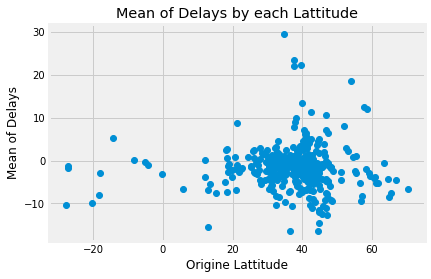

In [96]:
te5=test3.groupby("Lat").agg({'arr_delay':'mean','flights':'count'}).reset_index()
print(te5)
plt.scatter(te5["Lat"],te5["arr_delay"])
#plt.scatter(te5["Lat"],te5["flights"])
plt.xlabel('Origine Lattitude')
plt.ylabel('Mean of Delays')
plt.title('Mean of Delays by each Lattitude')


Text(0.5, 1.0, 'Number of flights by each Lattitude')

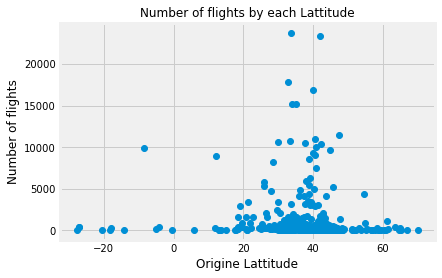

In [98]:
plt.scatter(te5["Lat"],te5["flights"])
plt.xlabel('Origine Lattitude')
plt.ylabel('Number of flights')
plt.title('Number of flights by each Lattitude',fontsize=12)

            Lon  arr_delay  flights
0   -176.644353   8.000000        7
1   -170.715969   5.250000        4
2   -166.541541  18.400000       35
3   -166.470379  -7.475000       40
4   -165.456037  -4.250000       40
..          ...        ...      ...
358  126.510681  -0.476496      468
359  141.670326  -0.938547      358
360  144.802060  -5.456140       57
361  145.729625  -7.550000       20
362  152.010155  -0.457364      129

[363 rows x 3 columns]


Text(0.5, 1.0, 'Mean of Delays by each Longtitude')

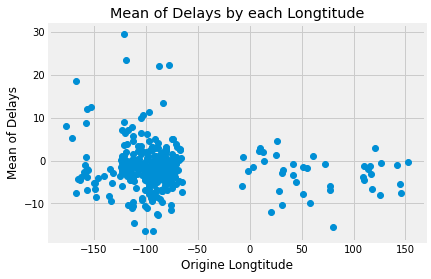

In [101]:
te5=test3.groupby("Lon").agg({'arr_delay':'mean','flights':'count'}).reset_index()
print(te5)
plt.scatter(te5["Lon"],te5["arr_delay"])
#plt.scatter(te5["Lat"],te5["flights"])
plt.xlabel('Origine Longtitude')
plt.ylabel('Mean of Delays')
plt.title('Mean of Delays by each Longtitude')
#plt.scatter(test4["Lat"],test4["arr_delay"])

Text(0.5, 1.0, 'Number of flights by each Longtitude')

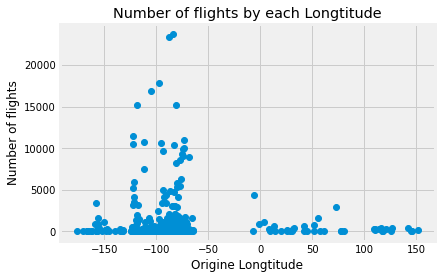

In [103]:
plt.scatter(te5["Lon"],te5["flights"])
#plt.scatter(te5["Lat"],te5["flights"])
plt.xlabel('Origine Longtitude')
plt.ylabel('Number of flights')
plt.title('Number of flights by each Longtitude')


it shows that the origin airport has influence on arr_delay
also delays related to the number of flights.

## 7- Estimated Departure Hour

In [104]:
test3['crs_dep_hour']=test3['crs_dep_time'].apply(lambda x: (x//100))

In [105]:
test3[['crs_dep_hour','crs_dep_time']]


,crs_dep_hour,crs_dep_time
0,10,1026
1,6,600
2,14,1430
3,18,1800
4,10,1025
...,...,...
477394,16,1600
477395,14,1420
477396,8,815
477397,9,940


In [106]:
test4=test3[(test3['is_delayed']==1)]

Text(0.5, 1.0, 'Mean of Delays by Estimated departure time')

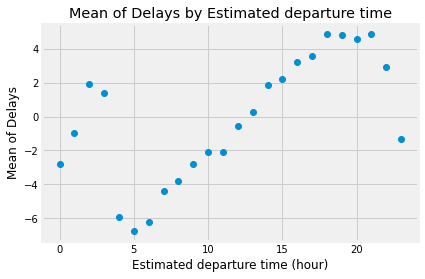

In [112]:
te5=test3.groupby("crs_dep_hour").agg({'arr_delay':'mean','flights':'count'}).reset_index()
plt.scatter(te5["crs_dep_hour"],te5["arr_delay"])
#plt.scatter(te5["Lat"],te5["flights"])
plt.xlabel('Estimated departure time (hour)')
plt.ylabel('Mean of Delays')
plt.title('Mean of Delays by Estimated departure time')
#plt.scatter(test3['crs_dep_hour'],test3['arr_delay'])

Text(0.5, 1.0, 'Number of flights by Estimated departure time')

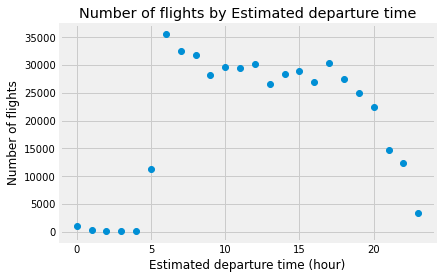

In [114]:
plt.scatter(te5["crs_dep_hour"],te5["flights"])
#plt.scatter(te5["Lat"],te5["flights"])
plt.xlabel('Estimated departure time (hour)')
plt.ylabel('Number of flights')
plt.title('Number of flights by Estimated departure time')

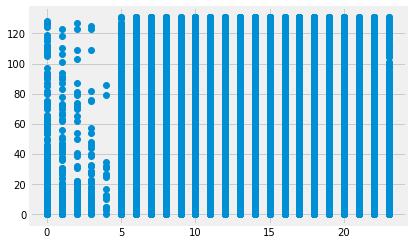

In [ ]:
plt.scatter(test4['crs_dep_hour'],test4['arr_delay'])

In [ ]:
test3.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'TotalDelay', 'is_delayed', 'year',
       'month', 'day', 'dayOfWeek', 'Speed Mile/Min', 'crs_Speed Mile/Min',
       'Airline_coeff', 'Lat', 'Lon', 'dep_hour'],
      dtype='object')

## 8-Estimated Arrival Hour

Text(0.5, 1.0, 'Mean of Delays by Estimated arrival time')

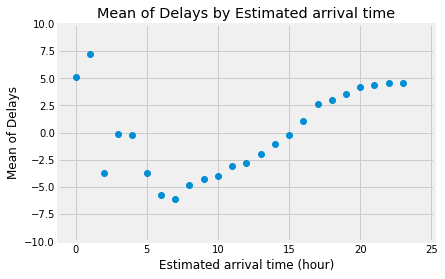

In [123]:
test3['crs_arr_hour']=test3['crs_arr_time']//100
#plt.scatter(test3['crs_arr_hour'],test3['arr_delay'])
te5=test3.groupby("crs_arr_hour").agg({'arr_delay':'mean','flights':'count'}).reset_index()
plt.scatter(te5["crs_arr_hour"],te5["arr_delay"])
#plt.scatter(te5["Lat"],te5["flights"])
plt.xlabel('Estimated arrival time (hour)')
#plt.xlim([0,23])
plt.ylim([-10,10])
plt.ylabel('Mean of Delays')
plt.title('Mean of Delays by Estimated arrival time')

Text(0.5, 1.0, 'Mean of Delays by Estimated arrival time')

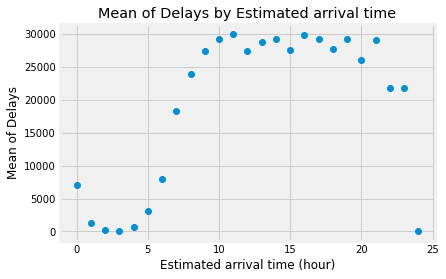

In [125]:
plt.scatter(te5["crs_arr_hour"],te5["flights"])
#plt.scatter(te5["Lat"],te5["flights"])
plt.xlabel('Estimated arrival time (hour)')
#plt.xlim([0,23])
#plt.ylim([-10,10])
plt.ylabel('Mean of Delays')
plt.title('Mean of Delays by Estimated arrival time')

## 9-Estimated elapse time (min)

Text(0.5, 1.0, ' Arrival Delays by Estimated elapse time')

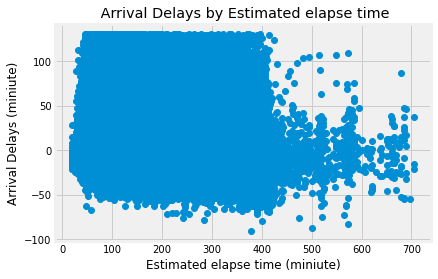

In [135]:
plt.scatter(test3['crs_elapsed_time'],test3['arr_delay'])
#te5=test3.groupby("crs_elapsed_time").agg({'arr_delay':'sum','flights':'count'}).reset_index()
#plt.scatter(te5["crs_elapsed_time"],te5["arr_delay"])
#plt.scatter(te5["Lat"],te5["flights"])
plt.xlabel('Estimated elapse time (miniute)')
plt.ylabel('Arrival Delays (miniute)')
plt.title(' Arrival Delays by Estimated elapse time')
#plt.scatter(test3['crs_dep_hour'],test3['arr_delay'])

## 10- Distance

Text(0.5, 1.0, 'Arrival Delays by Trip Distance (Mile)')

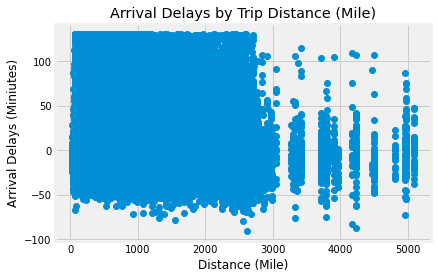

In [146]:
plt.scatter(test3['distance'],test3['arr_delay'])
#plt.scatter(test3['crs_elapsed_time'],test3['arr_delay'])
#te5=test3.groupby("distance").agg({'arr_delay':'mean','flights':'count'}).reset_index()
#plt.scatter(te5["distance"],te5["arr_delay"])
#plt.legend(['arr_delay','sum arr_delay'])
#plt.scatter(te5["Lat"],te5["flights"])
plt.xlabel('Distance (Mile)')
plt.ylabel('Arrival Delays (Miniutes)')
plt.title('Arrival Delays by Trip Distance (Mile)')
#plt.scatter(test3['crs_dep_hour'],test3['arr_delay'])

## 11- Root

In [148]:
test3['rout']=test3['origin_city_name']+'_'+test3['dest_city_name']

In [150]:
test10=test3[['arr_delay','rout','flights']].groupby('rout').sum()
test10['avg_delay']=test10['arr_delay']/test10['flights']

In [156]:
test10.sort_values(by=['arr_delay','avg_delay'],ascending=False)[:10]

,arr_delay,flights,avg_delay
rout,,,
"Chicago, IL_New York, NY",7147.0,1070,6.679439
"Chicago, IL_Newark, NJ",4744.0,363,13.068871
"Chicago, IL_St. Louis, MO",3957.0,411,9.627737
"Houston, TX_Dallas/Fort Worth, TX",3880.0,475,8.168421
"Chicago, IL_San Francisco, CA",3659.0,412,8.881068
"Dallas/Fort Worth, TX_Houston, TX",3536.0,526,6.722433
"Orlando, FL_Newark, NJ",3514.0,416,8.447115
"Denver, CO_San Francisco, CA",3375.0,331,10.196375
"San Francisco, CA_Seattle, WA",3283.0,618,5.312298


In [158]:
train_f=test3[['distance','crs_dep_hour' , 'crs_arr_hour','crs_elapsed_time',
       'month', 'day', 'dayOfWeek','Airline_coeff', 'Lat', 'Lon',
       'arr_delay']]

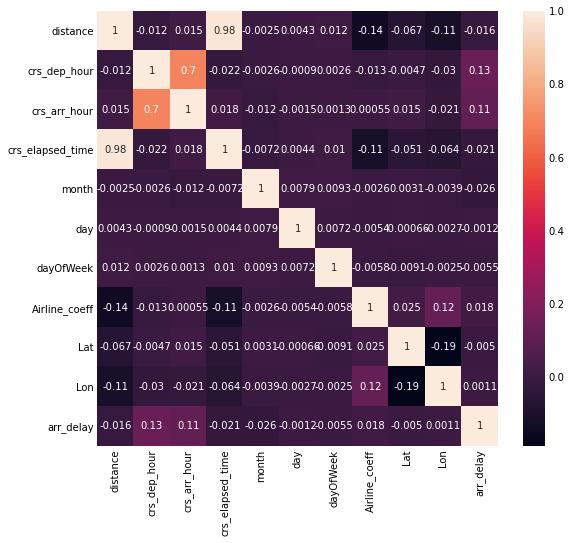

In [162]:
# Calculate Correlated features from sample
Corr = train_f.corr(method ='pearson')

import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
sn.heatmap(Corr, annot=True)
plt.show()


In [ ]:
X.dtypes

distance         float64
month            float64
day              float64
dayOfWeek        float64
Airline_coeff    float64
Lat              float64
Lon              float64
dep_hour         float64
dtype: object

In [ ]:
train_f.to_csv('B_Train_Features.csv')